# kaggle challange 

## Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ & ÎùºÏù¥Î∏åÎü¨Î¶¨ 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)


## Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ 

In [4]:
train.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [5]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  201410  221900.0         3       1.00         1180      5650     1.0   
1   1  201502  180000.0         2       1.00          770     10000     1.0   
2   2  201502  510000.0         3       2.00         1680      8080     1.0   
3   3  201406  257500.0         3       2.25         1715      6819     2.0   
4   4  201501  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      6         770              0      1933   
2           0     0  ...      8        1680              0      1987   
3           0     0  ...      7        1715              0      1995   
4           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [6]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÎã§

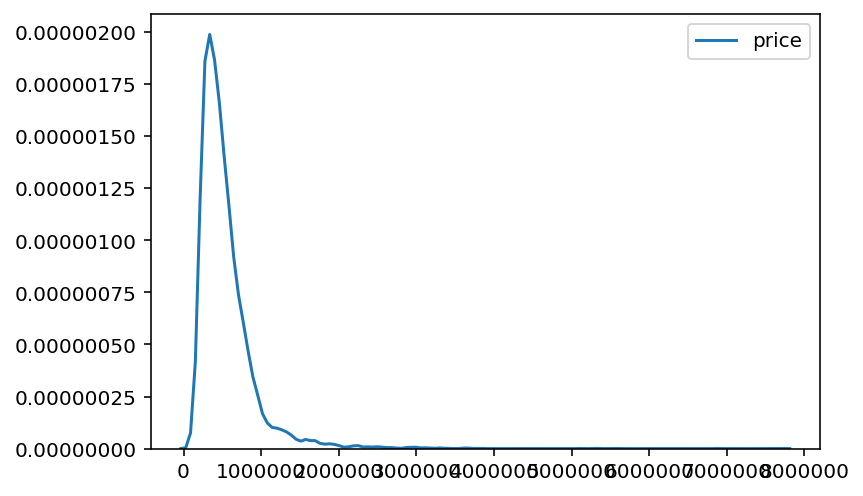

In [10]:
sns.kdeplot(y)
plt.show()

In [11]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

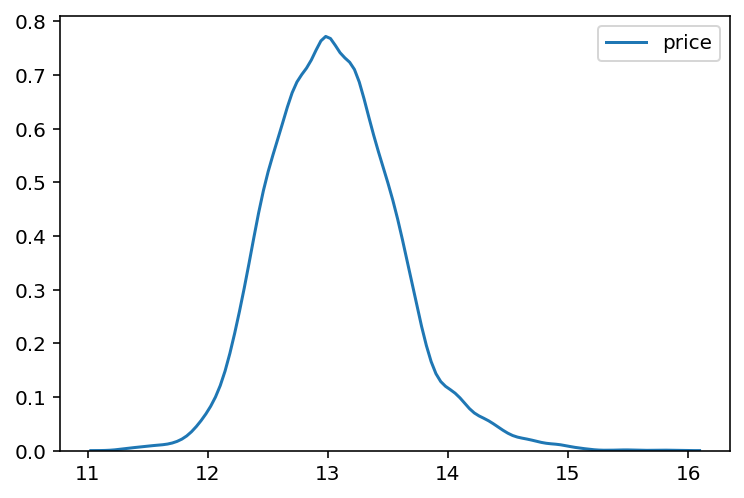

In [12]:
sns.kdeplot(y)
plt.show()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [16]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [17]:
# random_stateÎäî Î™®Îç∏Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÎûúÎç§ ÏãúÎìúÍ∞íÏûÖÎãàÎã§. 
#random_state=None    # Ïù¥Í≤å Ï¥àÍ∏∞Í∞íÏûÖÎãàÎã§. ÏïÑÎ¨¥Í≤ÉÎèÑ ÏßÄÏ†ïÌïòÏßÄ ÏïäÍ≥† NoneÏùÑ ÎÑòÍ≤®Ï£ºÎ©¥ Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.  
random_state=2020        # ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ïù¥Î†áÍ≤å Í≥†Ï†ïÍ∞íÏùÑ ÏÑ∏ÌåÖÌï¥ ÎëêÍ≤†ÏäµÎãàÎã§. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [18]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [19]:
df = {}

for model in models:
    # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ - Ïó¨Í∏∞ÏóêÎèÑ random_stateÎ•º Í≥†Ï†ïÌï©ÎãàÎã§. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)
    
    # ÏòàÏ∏°
    y_pred = model.predict(X_test)

    # ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
    df[model_name] = rmse(y_test, y_pred)
    
    # data frameÏóê Ï†ÄÏû•
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.63791789096,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125487.07102453562}

In [20]:
def get_scores(models, train, y):
    df = {}

    for model in models:
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

    return score_df

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

In [23]:
model = LGBMRegressor(random_state=random_state)

Ïñçüí¢


In [24]:
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    1.0s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [25]:
grid_model.cv_results_

{'mean_fit_time': array([0.07147274, 0.06238546, 0.11942434, 0.17985835]),
 'std_fit_time': array([0.00822239, 0.00578128, 0.00685085, 0.02416232]),
 'mean_score_time': array([0.00472136, 0.00625253, 0.00890851, 0.01398649]),
 'std_score_time': array([0.00060777, 0.00062533, 0.00057029, 0.00148409]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904

In [26]:
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [27]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [28]:
results = pd.DataFrame(params)
results['score'] = score

results

max_depth  n_estimators     score
0          1            50 -0.073394
1          1           100 -0.055020
2         10            50 -0.029177
3         10           100 -0.027027

In [29]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

max_depth  n_estimators     score      RMSE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [30]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

max_depth  n_estimators     score     RMSLE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [31]:
results = results.sort_values('RMSLE')
results

max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [34]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.13580793, 13.08051399, 14.11202067, ..., 13.01592878,
       12.69894979, 12.96297768])

In [35]:
prediction = np.expm1(prediction)
prediction

array([ 506766.66784595,  479506.10405112, 1345155.15609376, ...,
        449515.92243642,  327402.87855805,  426332.71354302])

In [36]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [37]:
submission['price'] = prediction
submission.head()

id         price
0  15035  5.067667e+05
1  15036  4.795061e+05
2  15037  1.345155e+06
3  15038  3.122579e+05
4  15039  3.338645e+05

In [38]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/home/aiffel-dj16/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.164399.csv


Ï≤´ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Îì§Î°ú csvÎ•º ÎßåÎì§Ïñ¥ÏÑú Ï†úÏ∂úÌñàÏßÄÎßå ÎßåÏ°±Ìï†ÎßåÌïú public scoreÎ•º ÏñªÏßÄ Î™ªÌñàÎã§.  
ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Îì§Ïùò Ï°∞Ï†ïÏùÑ Í±∞Ïπú ÌõÑ Îã§Ïãú csv ÌååÏùºÏùÑ ÎßåÎì§Ïñ¥ Ï§òÏïºÌïòÎäîÎç∞, ÏúÑÏùò Í≥ºÏ†ïÏùÑ Í±∞ÏπòÍ∏∞  
Î≤àÍ±∞Î°úÏö∞Îãà Ìï®ÏàòÎ°ú Î®ºÏ†Ä ÏÑ†Ïñ∏ÌïúÎã§.

In [39]:

def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [40]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.0168')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
/home/aiffel-dj16/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.0168.csv saved!


ÏúÑÏóê ÏÑ†Ïñ∏Ìïú data_dir ÎîîÎ†âÌÜ†Î¶¨Ïóê Îì§Ïñ¥Í∞ÄÎ©¥, ÏõêÌïòÎäî ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏñ¥ ÏûàÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.

ÏùºÎã®ÏùÄ ÏõêÌïòÎäî public scoreÎ•º Î∞õÏïÑÎÇ¥ÏßÄ Î™ªÌñàÍ∏∞ ÎïåÎ¨∏Ïóê, Î®ºÏ†Ä ÏÇ¨Ïö©ÌñàÎçò lightgbmÎ™®Îç∏ÏùÑ ÌäúÎãùÌï¥Ï£ºÍ∏∞Î°ú ÌñàÎã§.

Ï†ÅÏ†àÌûà ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Îì§ÏùÑ ÌäúÎãùÌïòÍ∏∞ ÏúÑÌï¥ÏÑú GridSearchÎ•º ÏÇ¨Ïö©ÌñàÎã§.

##  Grid_Search

In [32]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # Î™®Îç∏ fitting
    grid_model.fit(train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [33]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    0.6s finished


max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

## XGBoost

In [76]:
param_grid = {
    'n_estimators': [50,75, 100],#ÏÇ¨Ïö©ÌïòÎäî Í∞úÎ≥Ñ Î™®Îç∏Ïùò Ïàò. Î≥¥ÌÜµ 50~100Ïù¥ÏÉÅÏùò Ï†ïÏàòÎ•º ÏÇ¨Ïö©ÌïúÎã§.
    'max_depth': [1,5, 10], #ÎßéÏùÄ featureÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏùÑ ÏàòÎ°ù ÎçîÏö± ÎÜíÍ≤å ÏÑ§Ï†ïÌïúÎã§.
    'learning_rate': [0.01, 0.05, 0.1],#Î≥¥ÌÜµ 0.0001~0.1 ÏÇ¨Ïù¥Ïùò Ïã§ÏàòÎ•º ÏÇ¨Ïö©ÌïúÎã§.
    'num_leaves' : [5, 10, 15],#Ïù¥ÏßÑ Ìä∏Î¶¨ÏóêÏÑú Í∞ÄÏßà Ïàò ÏûàÎäî ÎßàÏßÄÎßâ ÎÖ∏Îìú.(=ÏûéÏÇ¨Í∑Ä)Ïùò ÏµúÎåÄÏπòÎ•º Ï†ïÌï¥Ï§ÄÎã§.
   # 'boosting_type' : ['gbdt', 'rf'],#Gradient Boosted Decision Trees, Random Forest
    'feature_fraction' : [0.7, 0.8, 0.9],
    'colsample_bytree' : [0.5, 1.0],
    'min_child_weight' : [1, 3]
}

model = XGBRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:    6.9s
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:   16.2s
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:   35.6s
[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 1975 tasks      | elapsed:  2.0min
[Parallel(n_jobs=5)]: Done 2582 tasks      | elapsed:  2.9min
[Parallel(n_jobs=5)]: Done 3271 tasks      | elapsed:  4.2min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed:  5.7min
[Parallel(n_jobs=5)]: Done 4860 out of 4860 | elapsed:  7.2min finished


[01:37:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/learner.cc:516: 
Parameters: { feature_fraction, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




colsample_bytree  feature_fraction  learning_rate  max_depth  \
485               0.5               0.9           0.10         10   
159               0.5               0.7           0.10         10   
160               0.5               0.7           0.10         10   
161               0.5               0.7           0.10         10   
321               0.5               0.8           0.10         10   
..                ...               ...            ...        ...   
10                0.5               0.7           0.01          1   
9                 0.5               0.7           0.01          1   
2                 0.5               0.7           0.01          1   
164               0.5               0.8           0.01          1   
0                 0.5               0.7           0.01          1   

     min_child_weight  n_estimators  num_leaves      score     RMSLE  
485                 3           100          15  -0.026209  0.161891  
159                 3           100           5  -0.026209  0.161891  
160                 3           100          10  -0.026209  0.161891  
161                 3           100          15  -0.026209  0.161891  
321                 3           100           5  -0.026209  0.161891  
..                ...           ...         ...        ...       ...  
10                  3            50          10 -57.852588  7.606089  
9                   3            50           5 -57.852588  7.606089  
2                   1            50          15 -57.852588  7.606089  
164                 1            50          15 -57.852588  7.606089  
0                   1            50           5 -57.852588  7.606089  

[972 rows x 9 columns]

## LGB 

In [87]:

param_grid = {
    'num_iterations': [1000,2000,3000],
    'max_depth': [1,5, 10], #ÎßéÏùÄ featureÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏùÑ ÏàòÎ°ù ÎçîÏö± ÎÜíÍ≤å ÏÑ§Ï†ïÌïúÎã§.
    'learning_rate' : [0.001,0.005,0.01, 0.05],#Î≥¥ÌÜµ 0.0001~0.1 ÏÇ¨Ïù¥Ïùò Ïã§ÏàòÎ•º ÏÇ¨Ïö©ÌïúÎã§.
    'num_leaves' : [5, 10, 15, 20, 31],#Ïù¥ÏßÑ Ìä∏Î¶¨ÏóêÏÑú Í∞ÄÏßà Ïàò ÏûàÎäî ÎßàÏßÄÎßâ ÎÖ∏Îìú.(=ÏûéÏÇ¨Í∑Ä)Ïùò ÏµúÎåÄÏπòÎ•º Ï†ïÌï¥Ï§ÄÎã§.
    'boosting_type' : ['gbdt', 'rf'],#Gradient Boosted Decision Trees, Random Forest
    'feature_fraction' : [0.7, 0.8, 0.9]
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   45.3s
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  3.6min
[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed:  5.3min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed:  8.1min
[Parallel(n_jobs=5)]: Done 1975 tasks      | elapsed: 11.2min
[Parallel(n_jobs=5)]: Done 2582 tasks      | elapsed: 14.7min
[Parallel(n_jobs=5)]: Done 4829 tasks      | elapsed: 15.7min
[Parallel(n_jobs=5)]: Done 5400 out of 5400 | elapsed: 15.8min finished


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


boosting_type  feature_fraction  learning_rate  max_depth  \
134           gbdt               0.7           0.01         10   
133           gbdt               0.7           0.01         10   
168           gbdt               0.7           0.05         10   
314           gbdt               0.8           0.01         10   
313           gbdt               0.8           0.01         10   
...            ...               ...            ...        ...   
1075            rf               0.9           0.05         10   
1076            rf               0.9           0.05         10   
1077            rf               0.9           0.05         10   
1078            rf               0.9           0.05         10   
1079            rf               0.9           0.05         10   

      num_iterations  num_leaves     score     RMSLE  
134             3000          31 -0.025314  0.159103  
133             3000          20 -0.025382  0.159318  
168             1000          20 -0.025450  0.159530  
314             3000          31 -0.025473  0.159603  
313             3000          20 -0.025482  0.159632  
...              ...         ...       ...       ...  
1075            3000           5       NaN       NaN  
1076            3000          10       NaN       NaN  
1077            3000          15       NaN       NaN  
1078            3000          20       NaN       NaN  
1079            3000          31       NaN       NaN  

[1080 rows x 8 columns]

## Gboost 

In [46]:

param_grid = {
    'n_estimators': [100,200],
    'max_depth': [1,5, 10],
    'learning_rate' : [0.0001,0.1,0.2],
    'min_samples_split' : [2, 3, 5, 10],
    'min_samples_leaf':[3, 5, 7, 10]
}

model = GradientBoostingRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    8.1s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   35.6s
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:  4.6min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  9.5min
[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed: 18.1min
[Parallel(n_jobs=5)]: Done 1440 out of 1440 | elapsed: 27.0min finished


learning_rate  max_depth  min_samples_leaf  min_samples_split  \
143         0.1000          5                 5                 10   
137         0.1000          5                 5                  2   
141         0.1000          5                 5                  5   
139         0.1000          5                 5                  3   
135         0.1000          5                 3                 10   
..             ...        ...               ...                ...   
28          0.0001          1                10                  5   
22          0.0001          1                 7                 10   
26          0.0001          1                10                  3   
18          0.0001          1                 7                  3   
0           0.0001          1                 3                  2   

     n_estimators     score     RMSLE  
143           200 -0.026895  0.163998  
137           200 -0.026895  0.163998  
141           200 -0.026895  0.163998  
139           200 -0.026895  0.163998  
135           200 -0.026944  0.164145  
..            ...       ...       ...  
28            100 -0.276751  0.526071  
22            100 -0.276751  0.526071  
26            100 -0.276751  0.526071  
18            100 -0.276751  0.526071  
0             100 -0.276751  0.526071  

[288 rows x 7 columns]

## ÌïôÏäµ 

ÏúÑ Grid SearchÎ•º ÌÜµÌï¥ÏÑú ÏñªÏñ¥ÎÇ∏ ÌååÎùºÎØ∏ÌÑ∞Îì§ÏùÑ ÌÜµÌï¥ÏÑú Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥† Ï†êÏàòÎ•º ÏñªÏóàÎã§.

In [88]:
xgboost = XGBRegressor(colsample_bytree = 0.5, feature_fraction = 0.9, learning_rate = 0.1, max_depth = 10, min_child_weight = 3, n_estimators = 100, num_leaves = 15, random_state= random_state)
lightgbm = LGBMRegressor(boosting_type = 'gbdt',feature_fraction = 0.7, learning_rate= 0.01, max_depth = 10, num_iterations = 3000, num_leaves = 31, random_state = random_state)
gboost = GradientBoostingRegressor(learning_rate = 0.1,max_depth = 5, min_samples_leaf = 5, min_samples_split = 10 ,n_estimators = 200, random_state = random_state)

models = [xgboost, lightgbm, gboost]
get_scores(models, train, y)

[02:08:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/learner.cc:516: 
Parameters: { feature_fraction, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RMSE
GradientBoostingRegressor  111319.229892
LGBMRegressor              107235.219470
XGBRegressor               105767.725287

Î∞òÎ≥µÏ†ÅÏúºÎ°ú ÎèåÎ†§ÏÑú LGBÎ•º 11\~Ï†ê ÎåÄÏóêÏÑú 10\~ Ï†ê ÎåÄÎ°ú ÎßåÎì§Ïñ¥ÎÉàÎã§..

Ïó¨Îü¨ Î™®Îç∏ÏùÑ ÏÑûÏñ¥ÏÑú Ïì∞Îäî Í≤ÉÏùÄ Îçî Ï¢ãÏùÄ Ï†ïÌôïÎèÑÎ•º Ï†úÍ≥µÌïúÎã§. 

Ï†êÏàòÎ•º ÎçîÏö± Ïò¨Î†§Ï£ºÍ∏∞ ÏúÑÌï¥ ÏïôÏÉÅÎ∏î Í∏∞Î≤ïÏù∏ votingÍ≥º averaging Ï§ëÏóê ÏÑ†ÌÉùÌï¥Ïïº ÌñàÎäîÎç∞,  
ÌòÑÏû¨ kaggleÏóêÏÑúÎäî Î∂ÑÎ•òÍ∞Ä ÏïÑÎãå ÌöåÍ∑ÄÎ•º Ìï¥ÏïºÌïòÍ∏∞ ÎïåÎ¨∏Ïóê averagingÏùÑ ÏÑ†ÌÉùÌñàÎã§.

In [93]:
models = [{'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'},
          {'model':gboost, 'name':'GradientBoost'}]

def AveragingBlending(models, train, y, sub_x):
    for m in models : 
        m['model'].fit(train, y)
    
    predictions = np.column_stack([
        m['model'].predict(test) for m in models
    ])
    return np.mean(predictions, axis=1)

prediction = AveragingBlending(models, train, y, test)

print(len(prediction))
prediction

[02:13:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/learner.cc:516: 
Parameters: { feature_fraction, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
6468


array([13.16128484, 13.0506666 , 14.12802535, ..., 13.05879782,
       12.68293714, 12.99514675])

In [94]:
prediction = np.expm1(prediction)
prediction

array([ 519843.41236517,  465405.54658078, 1366857.15670932, ...,
        469205.29740352,  322202.02605972,  440270.45207261])

In [95]:
def save_submission(prediction, model_name, rmsle=None):
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))


In [96]:
save_submission(prediction, 'ensemble(final)', rmsle='_')

/home/aiffel-dj16/aiffel/kaggle_kakr_housing/data/submission_ensemble(final)_RMSLE__.csv saved!


scoreÎäî ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú 108508.47041Ï†êÏùÑ ÌöçÎìùÌñàÎã§.

## ÎßàÏπòÍ∏¥ ÌñàÎäîÎç∞..  
ÏÜîÏßÅÌûà ÏñïÎ¥§Îçò ÌÜ†Ïù¥ÌîÑÎ°úÏ†ùÌä∏ ÏòÄÎã§. ÏöîÏ¶òÎì§Ïñ¥ ÎçîÎéåÏßÑ Í≥µÎ∂ÄÏóê ÎπÑÌï¥ Ìï† Í≤ÉÏùÄ Í∑∏ÎåÄÎ°ú ÏåìÏó¨Í∞ÄÎã§ Î≥¥Îãà,  
ÌèâÏÜå Ïûò ÎØ∏Î£®ÏßÄ ÏïäÎçò ÌîÑÎ°úÏ†ùÌä∏Îì§ÎèÑ ÌïòÎÇò Îëò ÏåìÏù¥Í∏∞ ÏãúÏûëÌïòÍ≥† Ïù¥Î†áÍ≤å ÏåìÏù∏ ÌîÑÎ°úÏ†ùÌä∏Îäî Îã§Ïãú  
ÏâΩÍ≤å ÏÜêÎåÄÏßÄ Î™ªÌïòÎäî Ïù¥Ïú†Í∞ÄÎêòÎäî ÏïÖÏàúÌôòÏù¥ Î∞òÎ≥µÎêêÎã§. Ïù¥ ÌîÑÎ°úÏ†ùÌä∏ÎèÑ "Í∑∏Î¶¨ÎìúÏÑúÏπòÎ°ú ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÏïÑÏ£ºÍ≥† Í∑∏Í±∞ ÎÑ£Ïñ¥ÏÑú ÌïôÏäµÏãúÌÇ§Î©¥ ÎêòÍ≤†ÏßÄ~"ÎùºÍ≥† ÏïÑÏ£º ÏâΩÍ≤å ÏÉùÍ∞ÅÌñàÎäîÎç∞ Ï†ïÎßê Ïò§ÎßåÏù¥ÏòÄÎã§.  
ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î°ú Î≠êÍ∞Ä Îì§Ïñ¥Í∞à Ïàò ÏûàÎäîÏßÄ Ï∞æÏïÑÎ≥¥Í≥†, Í∑∏ ÏïàÏóê Ï†ÅÏ†àÌïú Í∞íÏùÑ ÎÑ£Ïñ¥Ï£ºÍ≥†Í∞Ä Í≥ÑÏÜçÍ≥ÑÏÜç  
Î∞òÎ≥µÎêòÍ≥† Í∑∏ ÏôÄÏ§ëÏóê ÏãúÍ∞ÑÏù¥ ÍΩ§ÎÇò ÏßÄÏ≤¥ÎêòÎäî ÌïôÏäµÏãúÍ∞Ñ, ÏÑúÏπ≠ÏãúÍ∞Ñ ÎïåÎ¨∏Ïóê ÏòàÏÉÅÏô∏Î°ú Ï†ïÎßêÏ†ïÎßê Ïò§Îûú ÏãúÍ∞ÑÏù¥ Í±∏Î†∏Îã§.  
ÎçîÏù¥ÏÉÅ Í≤åÏúºÎ¶ÑÏùÄ ÏïàÎê† Í≤É Í∞ôÎã§. Îã§Ïãú ÎßàÏùåÏû°Í≥†, ÌïòÎ£®Ïóê Ï£ºÏñ¥ÏßÑ Ïùº Îì§ÏùÄ ÎßàÏ†Ä ÎÅùÎßàÏπòÍ≤†Îã§Í≥† Îã§ÏßêÌïòÍ≤å ÎêòÎäî ÌîÑÎ°úÏ†ùÌä∏ÏòÄÎã§.  
cs231nÍ∞ïÏùòÏóêÏÑúÎèÑ, Ïó¨Îü¨ ÎÖ∏ÎìúÏóêÏÑúÎèÑ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÏïÑÏ£ºÎäî Í≤ÉÏùÄ Îî•Îü¨Îãù Î™®Îç∏Ïù¥ÎÇò ÏûêÏ≤¥Ï†ÅÏù∏  ÏµúÏ†ÅÌôîÎ°ú Ïù¥Î§ÑÎÇº Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Ï§ëÏöîÌïòÎã§ ÎùºÎäî ÎßêÏùÑ ÎßéÏù¥ Îì§ÏóàÎã§. ÌòπÏãú ÌïòÎÇòÌïòÎÇò ÎÑ£Ïñ¥Ï£ºÎ©∞  
ÌïôÏäµÏãúÏºúÏ§òÏïº ÌïòÎ†§ÎÇò.. ÌïòÎäî ÏÉùÍ∞ÅÏóê ÎãµÏùÑ Ï£ºÎäî ÌîÑÎ°úÏ†ùÌä∏ÏòÄÎã§. ÏôÑÏ†Ñ Ïù¥Ìï¥ÌïòÏßÄÎèÑ Î™ªÌïú Í∞úÎÖêÏ†ÅÏù∏ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏù¥ ÏïÑÎãàÎùº ÏßÅÏ†ë Ïç®Î≥¥Í≥† Í≥ºÏ†ïÏùÑ ÏßÄÏºúÎ≥¥Î©¥ÏÑú Îçî Ïûò Ïù¥Ìï¥Ìï† Ïàò ÏûàÍ≤å ÎêòÎäî ÎäêÎÇåÏù¥ÏóàÎã§.  
kaggleÏùÄ Ï†ÄÎ≤à Ìï¥Ïª§ÌÜ§ÏùÑ Ìè¨Ìï®Ìï¥ Ïù¥Ï†úÎäî ptsdÍ∞Ä Ïò¨ Í≤É Í∞ôÎã§. ÏÉùÌåê ÏïÑÎ¨¥Í≤ÉÎèÑ Î™®Î•º ÎïåÎ°ú ÎèåÏïÑÍ∞Ä ÌîÑÎ°úÍ∑∏ÎûòÎ∞çÏùÑ Ï†ëÌï† ÎïåÏôÄ Í∞ôÏùÄ ÎäêÎÇåÏù¥ÏóàÎã§. kaggleÏóêÏÑúÎäî Ïù¥Î°†, ÌïôÏäµÏùÄ Ïã§Ï†ÑÍ≥º Îã§Î•¥Îã§Îäî Í≤ÉÏùÑ ÌôïÏã§Ìûà ÏïåÍ≤å Ìï¥Ï§¨Îã§. Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Ïù¥Ìï¥Î•º Î∞îÌÉïÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÍπéÏïÑÏ£ºÍ≥†, Î∂ôÏó¨Ï£ºÍ≥† Îòê Í∑∏Ïóê ÎßûÎäî Î™®Îç∏ÏùÑ Íµ¨ÏÑ±ÌïòÍ≥† ÌïôÏäµÏùÑ ÏãúÌÇ§Îäî Í≤ÉÏùÄ ÏïÑÏßÅ ÎÇ¥Í≤åÎäî Î≤ÖÏ∞¨ Í≤É Í∞ôÏßÄÎßå Ï°∞Í∏àÏî© Ï°∞Í∏àÏî© Ïù¥Ìï¥ÌïòÎ©∞ Ïû¨ÎØ∏Îäî Î∂ôÏó¨Í∞ÄÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Îã§ÌñâÏù∏ Í≤É Í∞ôÎã§.

